# Heart Disease Classification Using Machine Learning

This notebook demonstrates some foundation machine learning and data science concepts by exploring the problem of heart disease classification.  
Since the outcome is whether a patient has heart disease or not, the problem is a **Binary Classification**  

**Problem Statement:**
> Can a machine learning model predict whether or not a patient has heart disease based on given medical parameters of the patient?

**Data to solve the problem:**  

The original data came from the Cleveland database from UCI Machine Learning Repository[(link here)](https://archive.ics.uci.edu/ml/datasets/heart+disease).  

Features of the data (The Data Dictionary):  

1. age - age in years 
2. sex - (1 = male; 0 = female) 
3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl 
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved 
9. exang - exercise induced angina (1 = yes; 0 = no) 
10. oldpeak - ST depression induced by exercise relative to rest 
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy 
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising 
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)
---

## 0. Importing all necessary tools

In [108]:
# Data analysis and plotting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Classification models from Scikit-learn library
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluation and experimentation
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, plot_roc_curve

# saving the model
import joblib

## 1. Data loading & EDA

Load the dataset from the `data` folder and saving it as `Pandas` DataFrame. Then perform some exploratory data analysis(EDA) on the saved DataFrame.

In [2]:
data = pd.read_csv("data/heart-disease.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.shape # rows(samples) & columns(features+label)

(303, 14)

In [4]:
# datatypes of the dataset
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [5]:
# checking missing values if any
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

This dataset doesn't have missing values.  
The values present are numeric datatypes.

In [6]:
# checking class balance
data["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

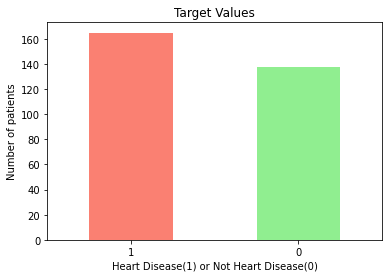

In [7]:
# visualizing the target
data["target"].value_counts().plot(kind="bar",
                                   color=["salmon", "lightgreen"],
                                   title="Target Values",
                                   xlabel="Heart Disease(1) or Not Heart Disease(0)",
                                   ylabel="Number of patients")
plt.xticks(rotation=0)
plt.show()

This is approximately a balanced class dataset.  

**Heart Disease Frequency according to `Sex` of the patient**

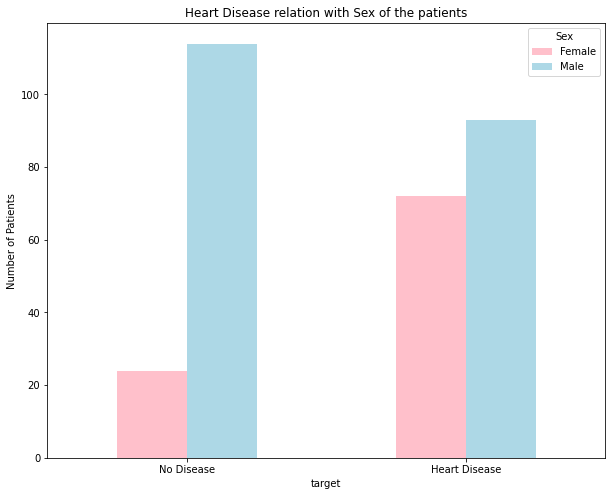

In [8]:
# visualize the relation b/w sex & target
pd.crosstab(data["target"], data["sex"]).plot(figsize=(10, 8),
                                              kind="bar",
                                              color=["pink", "lightblue"],
                                              title="Heart Disease relation with Sex of the patients",
                                              ylabel="Number of Patients")
plt.xticks(ticks=[0, 1], labels=["No Disease", "Heart Disease"], rotation=0)
plt.legend(["Female", "Male"], title="Sex")
plt.show()

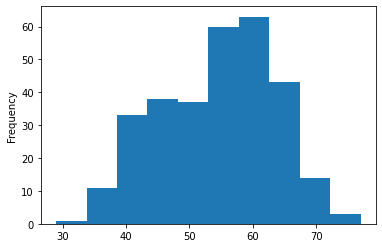

In [9]:
# checking the distribution of age of the patients
data["age"].plot.hist();

it's a normal distribution but slightly swaying to the right.

**Age and Maximum heart rate(Thalach) of the patients relation to Heart Disease(Target)**

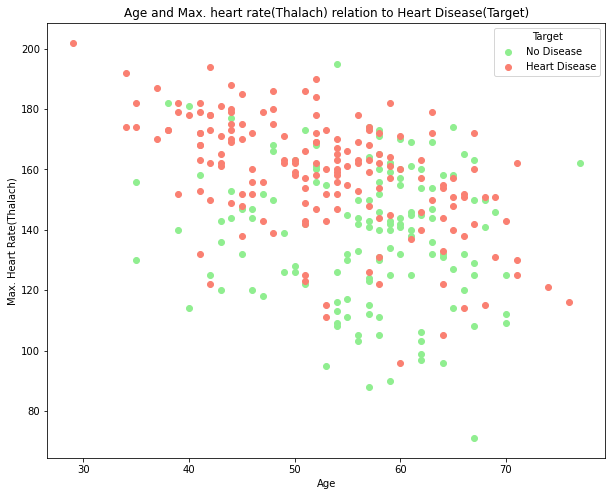

In [10]:
# visualizing the relation of age & thalach to the target
# create figure
fig, ax = plt.subplots(figsize=(10, 8))
# scatter plot only for the patients with no heart disease
scatter0 = ax.scatter(data["age"][data["target"]==0],
                      data["thalach"][data["target"]==0],
                      color="lightGreen",
                      label="No Disease")
# scatter plot only for the patients with heart disease
scatter1 = ax.scatter(data["age"][data["target"]==1],
                      data["thalach"][data["target"]==1],
                      color="salmon",
                      label="Heart Disease")
# customizing the plot
ax.set_title("Age and Max. heart rate(Thalach) relation to Heart Disease(Target)")
ax.set_xlabel("Age")
ax.set_ylabel("Max. Heart Rate(Thalach)")
ax.legend(title="Target")
plt.show()

**Heart Disease Frequency per Chest Pain Type**

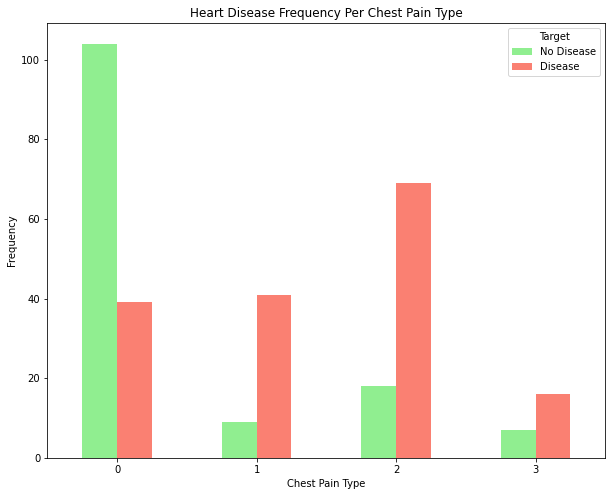

In [11]:
# Create a crosstab and base plot
pd.crosstab(data["cp"], data["target"]).plot(kind="bar", 
                                             figsize=(10,8), 
                                             color=["lightgreen", "salmon"])

# Add attributes to the plot to make it more readable
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"], title="Target")
plt.xticks(rotation = 0);

**Relation between all independent variables and the dependent variable**

Making correlation matrix to find the relation (dependency) between Independent variables(Features) and Dependent variable(Target)

In [12]:
# correlation matrix with Pandas DataFrame
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


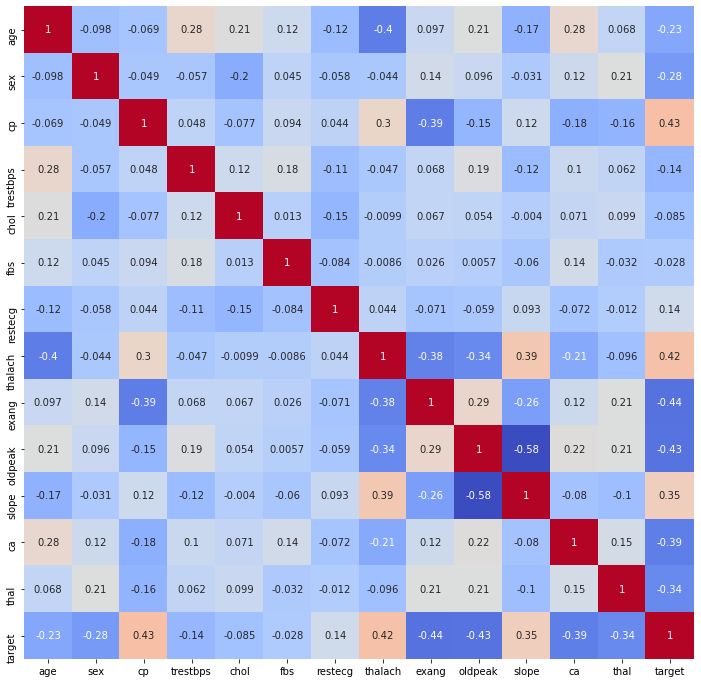

In [13]:
# visualizing correlation matrix using Seaborn heatmap
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(data.corr(),
            annot=True,
            cmap="coolwarm",
            cbar=False,
            ax=ax)
plt.show()

**Note:** A higher positive value means a potential positive correlation and a higher negative value means a potential negative correlation.

## 3. Modelling

### 3.1 Data preparation for modelling

In [14]:
# spliting features and target label
X = data.drop(columns="target")
y = data["target"]

X.shape, y.shape

((303, 13), (303,))

In [15]:
# creating train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

### 3.2 Model selection

Here are the 3 main classification models/algorithms from `scikit-learn` library,
- Logistic regression
- Random forest classifier
- K-Nearest neighbors classifier

To choose which model performs better with this data, the baseline models of these 3 are created and compared.

In [16]:
## Function to test the baseline models
# create a function to fit and score the given models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Function to fit(train) the given ML models on the training dataset and score(evaluate) them on the test dataset.
    Parameters:
    models = dictionary of machine learing models
    X_train = training data without labels
    X_test = testing data without labels
    y_train = training data only labels
    y_test= testing data only labels
    Returns:
    model_scores = dictionary of evaluated scores of fitted given ML models
    """
    # set random seed
    np.random.seed(9)
    # empty dictionary to hold scores
    model_scores = {}
    # loop to fit & score each model on the training data
    for name, model in models.items():
        # train the model
        model.fit(X_train, y_train)
        # test the fitted model
        model_scores[name] = model.score(X_test, y_test)
    # returns evaluated scores of fitted models
    return model_scores

In [17]:
# create a models dictionary to instantiate and hold all three models
models ={"Logistic Regression": LogisticRegression(solver="liblinear"),
         "KNN Classifier": KNeighborsClassifier(),
         "Random Forest Classifier": RandomForestClassifier()}

In [18]:
# call the function with proper arguments & save scores returned
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

{'Logistic Regression': 0.8524590163934426,
 'KNN Classifier': 0.7049180327868853,
 'Random Forest Classifier': 0.819672131147541}

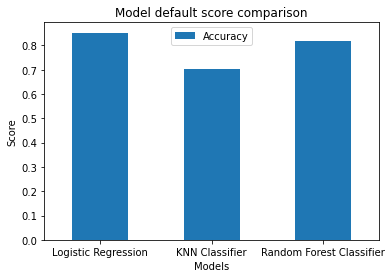

In [19]:
# for comparing each models baseline score, convert the dictionary into DataFrame
model_compare = pd.DataFrame(model_scores, index=["Accuracy"]).T # Transposing the DataFrame to get proper visualizaton
# create a bar to compare
model_compare.plot(kind="bar",
                   title="Model default score comparison",
                   xlabel="Models",
                   ylabel="Score")
plt.xticks(rotation=0)
plt.show()

From the baseline scores: `LogisticRegression()` performs well.  

### 3.3 hyperparameter tuning

Cannot decide based on the parameters settings of the baseline models.  
So, tuning some of the hyperparameters of each models would give a clear choice.

#### 3.3.1 Tuning the hyperparameters manually

First tune the hyperparameters of `KNN Classifier` **manually**

In [20]:
# the hyperparameters of KNN Classifier we can tune
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [21]:
# we are tuning the `n_neighbors` parameter of KNN

# set random seed
np.random.seed(9)

# create empty list to store test scores
knn_test_scores = []
# create range of values to input
neighbors = range(1, 21)
# Model instantiation
knn = KNeighborsClassifier()

# loop to try different values for n_neighbors of KNN
for n in neighbors:
    # setting different n_neighbors values
    knn.set_params(n_neighbors=n)
    # train the model
    knn.fit(X_train, y_train)
    # evaluate the model and adding the scores to the list
    knn_test_scores.append(knn.score(X_test, y_test))

In [22]:
knn_test_scores

[0.6557377049180327,
 0.5737704918032787,
 0.6885245901639344,
 0.6721311475409836,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.6721311475409836,
 0.6557377049180327,
 0.6557377049180327,
 0.639344262295082,
 0.6229508196721312,
 0.6885245901639344,
 0.6557377049180327,
 0.6721311475409836,
 0.6229508196721312,
 0.639344262295082,
 0.6229508196721312,
 0.6557377049180327,
 0.6065573770491803]

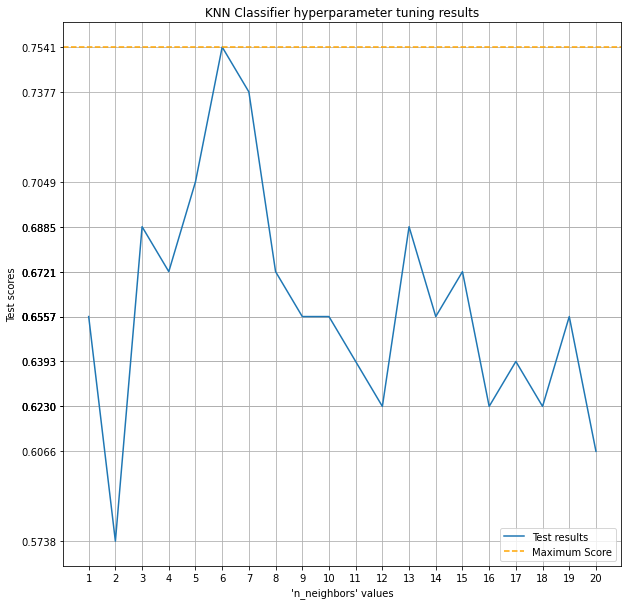

The Maximum score obtained in the tuning process is 75.41%


In [23]:
# visualizing the test scores
# create figure
plt.figure(figsize=(10, 10))
# line plot to view the scores for respective n_neighbors
plt.plot(neighbors,
         knn_test_scores,
         label="Test results")
# horizondal line to indicate the maximum test score
plt.axhline(y=max(knn_test_scores),
            color="orange",
            linestyle="--",
            label="Maximum Score")

plt.xlabel("'n_neighbors' values")
plt.ylabel("Test scores")
plt.title("KNN Classifier hyperparameter tuning results")
plt.xticks(neighbors)
plt.yticks(knn_test_scores)
plt.grid()
plt.legend()
plt.show()

# what the maximum accuracy we reached with this simple tuning ?
print(f"The Maximum score obtained in the tuning process is {max(knn_test_scores)*100:.2f}%")

KNN Classifier's performance didn't  near to the other 2 models' baseline performances even after the tuning process.  
So the KNN Classifier is elinimated and further experiments done on other 2 models.

#### 3.3.2 Tuning the models using `RandomizedSearchCV()`

Next using the `RandomizedSearchCV()` to tune the `LogisticRegression` & `RandomForestClassifier` models.


In [24]:
# the hyperparameters of logistic regression we can tune
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [25]:
# the hyperparameters of random forest classifier we can tune
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [26]:
# create parameters grid for logistic regression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"],
                "penalty": ["l1", "l2"]}

# create parameters grid for random forest classifier
rf_grid = {"n_estimators": np.arange(10, 1001, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_leaf": np.arange(1, 21, 2),
           "min_samples_split": np.arange(2, 21, 2)}

**Tune the logistic regression model using `RandomizedSearchCV()`**

In [27]:
# set random seed
np.random.seed(9)

# first tune the logistic regression using RandomizedSearchCV()
rs_log_reg = RandomizedSearchCV(estimator=LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)
# fit the Randomly searched model
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.4s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear']},
                   verbose=True)

In [28]:
# see the best parameters chosen by random searching
rs_log_reg.best_params_

{'solver': 'liblinear', 'penalty': 'l2', 'C': 0.23357214690901212}

In [29]:
# Now see the accuracy sccore of the tuned model
rs_log_reg.score(X_test, y_test)

0.8688524590163934

**Tune the RandomForestClassifier model using `RandomizedSearchCV()`**

In [30]:
# set random seed
np.random.seed(9)

# tune the RandomForestClassifier model using RandomizedSearchCV with n_iter=20
rs_rf = RandomizedSearchCV(estimator=RandomForestClassifier(),
                           param_distributions=rf_grid,
                           n_iter=20,
                           cv=5,
                           verbose=True)
# fit the randomly searched random forest model
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.2min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [31]:
# see the randomly searched best hyperparameters
rs_rf.best_params_

{'n_estimators': 660,
 'min_samples_split': 6,
 'min_samples_leaf': 17,
 'max_depth': None}

In [32]:
# what is the accuracy score of our randomly search random forest model?
rs_rf.score(X_test, y_test)

0.8360655737704918

Randomized searching improves `RandomForsetClassifier()`'s score.  
Still one more tuning method `GridSearchCV()` can be used here to tune the models.

#### 3.3.3 Tuning the models using `GridSearchCV()`

Using the `GridSearchCV()` to tune the LogisticRegression & RandomForestClassifier models.  

**Tuning `RandomForestClassifier()`**

In [33]:
# create parameters grid for logistic regression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"],
                "penalty": ["l1", "l2"]}

# create parameters grid for random forest classifier
rf_grid = {"n_estimators": np.arange(600, 1001, 50),
           "max_depth": [None, 10],
           "min_samples_leaf": np.arange(5, 10, 2),
           "min_samples_split": np.arange(10, 15, 2)}

In [34]:
# set random seed
np.random.seed(9)
# tune the hyperparameters exhaustively using GridSearchCV for Random forest classifier
gs_rf = GridSearchCV(estimator=RandomForestClassifier(),
                          param_grid=rf_grid,
                          cv=5,
                          verbose=True)
# fit the tuned model
gs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 810 out of 810 | elapsed: 29.0min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10],
                         'min_samples_leaf': array([5, 7, 9]),
                         'min_samples_split': array([10, 12, 14]),
                         'n_estimators': array([ 600,  650,  700,  750,  800,  850,  900,  950, 1000])},
             verbose=True)

In [35]:
# check the best fitted hyperparameters
gs_rf.best_params_

{'max_depth': 10,
 'min_samples_leaf': 9,
 'min_samples_split': 10,
 'n_estimators': 850}

In [36]:
# testing the tuned model
gs_rf.score(X_train, y_train)

0.871900826446281

**Tuning `LogisticRegression()`**

In [37]:
# set random seed
np.random.seed(9)
# tune the hyperparameters exhaustively using GridSearchCV for Logistic regression
gs_log_reg = GridSearchCV(estimator=LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=10,
                          verbose=True)
# fit the tuned model
gs_log_reg.fit(X_train, y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    4.8s finished


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             verbose=True)

In [38]:
# check the best fitted hyperparameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'penalty': 'l2', 'solver': 'liblinear'}

In [39]:
# testing the tuned model
gs_log_reg.score(X_train, y_train)

0.859504132231405

The exhaustive search `GridSearchCV()` gives a good boost to the `RandomForestClassifier()` model from the baseline score.

## 4. Evaluating the model

So far the default `.score()` method has been used to evaluate the models.  
`scikit-learn` library has a bunch of evaluation metrics to test the classification models.  
Like,
* Confusion Matrix
* The ROC curve and AUC score
* Classification report
* Accuracy Score
* Precision
* Recall
* F1-score
  

These metrics can be evaluated using `(k-fold) cross-validation`.

In [40]:
# the so far best model is
gs_rf.best_params_

{'max_depth': 10,
 'min_samples_leaf': 9,
 'min_samples_split': 10,
 'n_estimators': 850}

In [41]:
# second best
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'penalty': 'l2', 'solver': 'liblinear'}

In [42]:
# making predictions on the test data
rf_y_preds = gs_rf.predict(X_test)

log_reg_y_perds = gs_log_reg.predict(X_test)

### 4.1 Confusion matrix

In [43]:
confusion_matrix(y_test, rf_y_preds)

array([[21,  3],
       [ 4, 33]], dtype=int64)

In [44]:
# function to create confusion matrix
def conf_matrix(y_true, y_preds):
    """
    Function to calculate and plot confusion matrix by comparing given y_ture & y_preds values.
    Parameters:
    y_true= true(test) labels
    y_preds= predicted labels    
    """
    # create confusion matrix
    conf_mat = confusion_matrix(y_test, y_preds)
    # visualizing confusion matrix with Seaborn Heatmap
    # create a figure
    fig, ax = plt.subplots(figsize=(4, 4))
    # set seaborn font size
    sns.set(font_scale=1.5)
    # seaborn heatmap for the confusion matrix
    sns.heatmap(conf_mat,
                annot=True,
                cbar=False,
                cmap="winter_r",
                ax=ax)
    # customizing the plot
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("Actual Labels")
    
    plt.show()

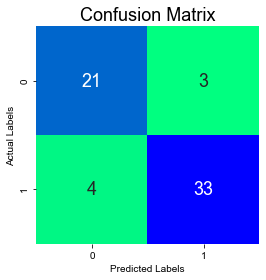

In [45]:
# RandomForestClassifier confusion matrix
conf_matrix(y_test, rf_y_preds)

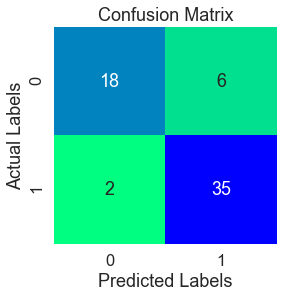

In [46]:
# LogisticRegression confusion matrix
conf_matrix(y_test, log_reg_y_perds)

### 4.2 ROC Curve and AUC Score

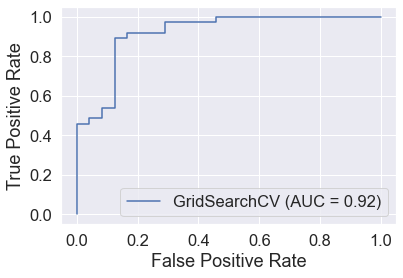

In [47]:
# plotting ROC curve of random forest classifier
plot_roc_curve(gs_rf, X_test, y_test);

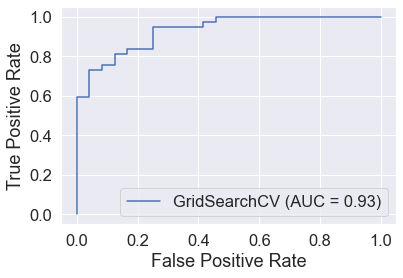

In [48]:
# plotting ROC curve of logistic regression
plot_roc_curve(gs_log_reg, X_test, y_test);

### 4.3 Classification Report 

In [49]:
# for random forest classifier
print(classification_report(y_test, rf_y_preds))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        24
           1       0.92      0.89      0.90        37

    accuracy                           0.89        61
   macro avg       0.88      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [50]:
# for logistic regression
print(classification_report(y_test, log_reg_y_perds))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        24
           1       0.85      0.95      0.90        37

    accuracy                           0.87        61
   macro avg       0.88      0.85      0.86        61
weighted avg       0.87      0.87      0.87        61



### 4.4 Cross-validated metrics

Calculate `accuracy`,`precision`, `recall`, `f1-score` using k-fold cross validation method

In [51]:
# instantiating new models with GridSearchCV models' parameters

# storing best params
rf_best_params = gs_rf.best_params_
log_reg_best_params = gs_log_reg.best_params_

# set random seed
np.random.seed(9)

# new models instantiation
rf_model = RandomForestClassifier(n_estimators=rf_best_params["n_estimators"],
                                  max_depth=rf_best_params["max_depth"],
                                  min_samples_leaf=rf_best_params["min_samples_leaf"],
                                  min_samples_split=rf_best_params["min_samples_split"])
log_reg_model = LogisticRegression(C=log_reg_best_params["C"],
                                   penalty=log_reg_best_params["penalty"],
                                   solver=log_reg_best_params["solver"])
# fitting the models with train data
rf_model.fit(X_train, y_train)

log_reg_model.fit(X_train, y_train);

In [52]:
# function to calculate cross validated metrics 
def cross_val_metrics(model, X, y):
    """
    Function to evaluate a given model to calculate accuracy, precision, recall, f1 score using Cross-validation method
    for the given test X & y data.
    Parameters:
    model= estimator to be evaluated
    X= data without target variable
    y= true target labels 
    
    Returns:
    cross_val_results= dictionary of scores of cross-validated metrics
    """
    # list of metrics to evaluate
    metrics = ["accuracy", "precision", "recall", "f1"]
    # empty dictionary to store cross-validated scores
    cross_val_results = {}
    # set random seed
    np.random.seed(9)
    # loop to evaluate and store each metric
    for metric in metrics:
        cross_val_results[metric] = np.mean(cross_val_score(estimator=model,
                                                            X=X,
                                                            y=y,
                                                            cv=5,
                                                            scoring=metric))
    return  cross_val_results

In [53]:
# for random forest classifier
rf_cv_scores = cross_val_metrics(model=rf_model,
                                 X=X,
                                 y=y)
rf_cv_scores

{'accuracy': 0.8414207650273224,
 'precision': 0.8325396825396826,
 'recall': 0.8727272727272727,
 'f1': 0.844244431048941}

In [54]:
# for logistic regression
log_reg_cv_scores = cross_val_metrics(model=log_reg_model,
                                      X=X,
                                      y=y)
log_reg_cv_scores

{'accuracy': 0.8479781420765027,
 'precision': 0.8215873015873015,
 'recall': 0.9272727272727274,
 'f1': 0.8705403543192143}

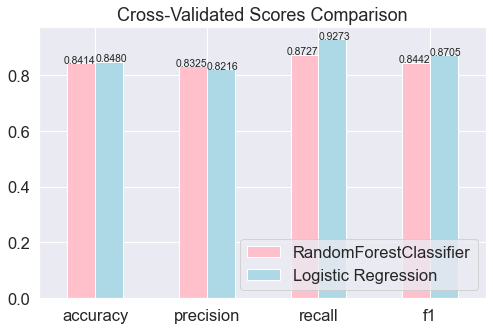

In [55]:
# comparing the cross-validated scores
cv_scores = pd.DataFrame(data=[rf_cv_scores, log_reg_cv_scores], index=["RandomForestClassifier", "Logistic Regression"]).T

# visual comparison
cv_scores.plot(kind="bar", figsize=(8, 5), title="Cross-Validated Scores Comparison", rot=0, color=["pink", "lightblue"] )

# annotating the score values 
for i, v in enumerate(cv_scores["RandomForestClassifier"].values):
    plt.text(x=i, y=v, s=f"{v:.4f}", ha="right", fontsize="xx-small")
for i, v in enumerate(cv_scores["Logistic Regression"].values):
    plt.text(x=i, y=v, s=f"{v:.4f}", ha="left", fontsize="xx-small")

plt.legend(loc="lower right")
plt.show()

## 5. Feature Importance

> Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable.  

Trying to find which feature condributed more to the outcomes of the model  

### 5.1 For RandomForestClassifier Model

In [81]:
# checking coefficients
rf_model.feature_importances_

array([0.04224609, 0.02844188, 0.16395982, 0.02116237, 0.02892834,
       0.00118769, 0.0142002 , 0.13397799, 0.11002037, 0.12859138,
       0.06775028, 0.10076586, 0.15876773])

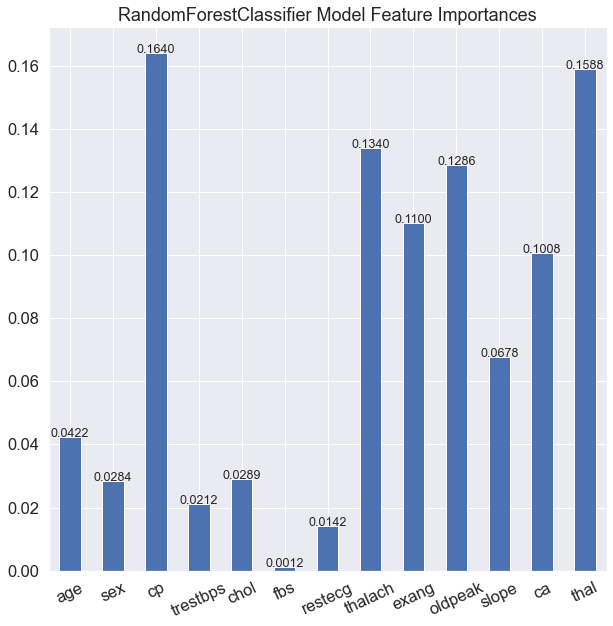

In [94]:
# visualize and try to learn something from feature importances
importances = pd.DataFrame(data=rf_model.feature_importances_, index=X.columns, columns=["importance"])
# create plot - Bar graph
importances.plot(kind="bar",
                 legend=False,
                 title="RandomForestClassifier Model Feature Importances",
                 figsize=(10, 10),
                 rot=25)
# annotate the value of each bar
for i, v in enumerate(rf_model.feature_importances_):
    plt.text(x=i, y=v, s=f"{v:.4f}", ha="center", fontsize="x-small")

### 5.2 For Logistic Regression Model 

In [95]:
# checking coefficients of independent variables
log_reg_model.coef_

array([[ 0.01276499, -0.85024743,  0.61787195, -0.01914141, -0.00250548,
         0.16821278,  0.32400874,  0.02972411, -0.59549025, -0.46102329,
         0.36348561, -0.47262106, -0.73853147]])

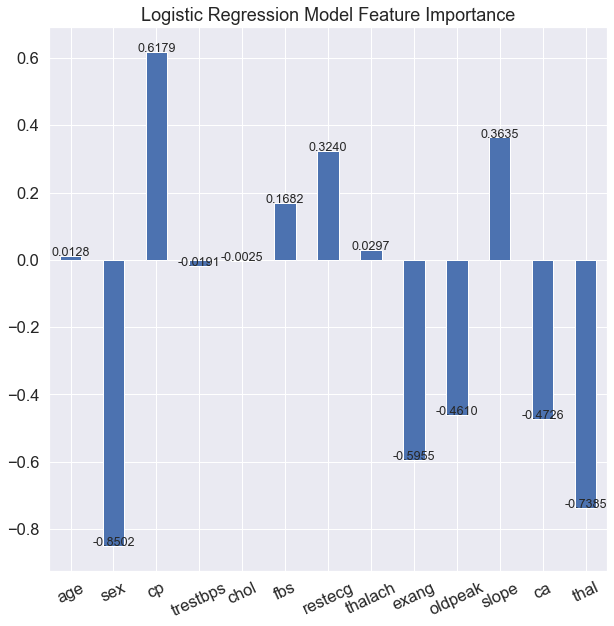

In [107]:
# visualizing the feature importance of Logistic Regression model
coeffs = pd.DataFrame(data=log_reg_model.coef_[0], columns=["Feature Importance"], index=X.columns)
coeffs.plot(kind="bar",
            figsize=(10, 10),
            legend=False,
            title="Logistic Regression Model Feature Importance",
            rot=25)
# annotate the values
for i, v in enumerate(log_reg_model.coef_[0]):
    plt.text(x=i, y=v, s=f"{v:.4f}", fontsize="x-small", ha="center")

**Saving the trained model to share and reload elsewhere**

In [109]:
# saving random forest model
joblib.dump(rf_model, "models/Heart-disease-classification-random-forest-model.joblib")

['models/Heart-disease-classification-random-forest-model.joblib']

In [110]:
# saving logistic regression model
joblib.dump(log_reg_model, "models/Heart-disease-classification-logistic-regression-model.joblib")

['models/Heart-disease-classification-logistic-regression-model.joblib']

## 6. Further Experimentation & Analysis

The concepts explored in this notebook for this particular dataset & problem statement are very few & basic; But These are **common and potentially important** things to do when exploring a structured dataset.  

In addition to these, the other ideas or concepts can be used to utilize this data and extract more insights.  
In this case, the trained machine learning model can be improved to classify the patients more reliably to save them from the consequences.  
There are various ways to do so, such as,  
- Collecting more data
- Trying different algorithms to build an error-free model, like, CatBoost, XGBoost, LinearSVC. Naive Bayes Classifiers, etc.,
- Trying different hyperparameters for tuning the current models.
- Modifying/Improving the model evaluation methods & metrics

Always spending more time to understand the problem and data helps.  
Consulting a subject matter export(SEM) on the data would be great to see all the information in a productive way with the  domain knowledge.